## Get SDSS DR7 QSO Summary data

The data is located at https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html 

In [4]:
import os
path = os.getcwd()
# Get the quasar catalog - it gets saved in the same directory as the notebook 
url = "https://faculty.washington.edu/ivezic/macleod/qso_dr7/DB_QSO_S82.dat.gz"
os.system(f'wget {url}')   

In [3]:
import os
from astropy.table import Table
path = os.getcwd()
file_path = os.path.join(path, "DB_QSO_S82.dat.gz")
# we know the column meaning from 
# https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_DB.html
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
SDSS_DB_QSO = Table.read(file_path, format='ascii', names = colnames)

In [4]:
SDSS_DB_QSO[:5]

dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
70,2.169302,1.238649,301,-23.901,-24.181,1.073,0.0,0.0,20.793,20.469,20.197,20.04,20.0,0.116
98,1.091028,0.962126,144,-23.399,-23.576,0.7867,0.0,0.0,20.79,20.183,19.849,19.818,19.43,0.183
233,0.331289,0.17723,58,-24.735,-25.058,1.6199,0.0,0.0,20.892,20.554,20.431,20.199,20.099,0.154
1018,1.364696,-0.098956,190,-23.121,-24.045,0.6125,0.0,45.433,20.098,19.722,19.784,19.485,19.541,0.178
1310,0.221552,-0.292485,36,-26.451,-26.974,2.7563,9.361,46.76,20.707,19.663,19.61,19.705,19.529,0.174


## Get SDSS DR7 QSO Light Curve data

The data is located at https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html 


In [ ]:
url = "https://faculty.washington.edu/ivezic/macleod/qso_dr7/QSO_S82.tar.gz"
os.system(f'wget {url}')  

Unpack the light curves...https://www.geeksforgeeks.org/tar-command-linux-examples/

In [ ]:
! tar xvzf QSO_S82.tar.gz

Confirm that all the light curves are there ...

In [5]:
len(os.listdir("QSO_S82"))

9258

In [7]:
#os.listdir("QSO_S82")

## Get the PS1 QSO data 

All the code needed to execute the SQL query is in https://github.com/suberlak/PS1_SDSS_CRTS/blob/master/code2/Get_PS1_DR2_Quasar_data.ipynb 
    
However, instead of obtaining data for all 9258 objects, it suffices to get the data only for the CLQSO candidates from the paper.
    
The table of candidates can be downloaded from https://iopscience.iop.org/0004-637X/907/2/96/suppdata/apjabc698t5_ascii.txt?doi=10.3847/1538-4357/abc698. I copy-paste the text into a text file that I attach in the e-mail as "CLQSO_candidates.txt"

In [8]:
colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
            'f_Edd','Delta(mag)',
            'Delta(sigma_G)', 'MedianPS1']
clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                   names=colnames)

In [9]:
clqso[:5]

dbID,SDSSJID,ra,dec,Redshift,log10_Lbol,log10_MBH,f_Edd,Delta(mag),Delta(sigma_G),MedianPS1
str9,str18,float64,float64,float64,float64,str4,str5,float64,float64,float64
123909,001626.54+003632.4,4.111,0.609,3.24,46.57,9.47,-1.0,-0.29,-0.054,20.48
8442,001731.70+004910.1,4.382,0.819,2.43,46.61,9.09,-0.58,-0.36,-0.107,20.36
4069419,003359.39+000230.0,8.497,0.042,1.64,45.95,9.05,-1.21,0.22,0.017,20.2
221006,005142.20+002129.0,12.926,0.358,1.55,45.95,8.24,-0.39,0.21,-0.01,19.97
257776,005513.15-005621.2,13.805,-0.939,3.61,47.13,9.58,-0.54,-0.32,-0.242,19.53


Besides, it turns out there's now an improved interface to PS1 DR2: https://catalogs.mast.stsci.edu/panstarrs/

All one needs to do is to usse the "Crossmatch a List of Targets " option, uploading a csv file with columns "target ra dec"(where "target") is any object name we choose for convenience).

So lets make one:

In [10]:
clqso[['dbID','ra','dec']].write('CLQSO_candidates_ra_dec.tbl', format='ipac',
                                names=('target','ra','dec'),
                                overwrite=True)

In [42]:
clqso[['dbID','ra','dec']].write('CLQSO_candidates_ra_dec.csv', format='csv',
                                names=('target','ra','dec'),
                                overwrite=True)

"Forced mean object", and "Detections" are two tables worth checking. 

I get 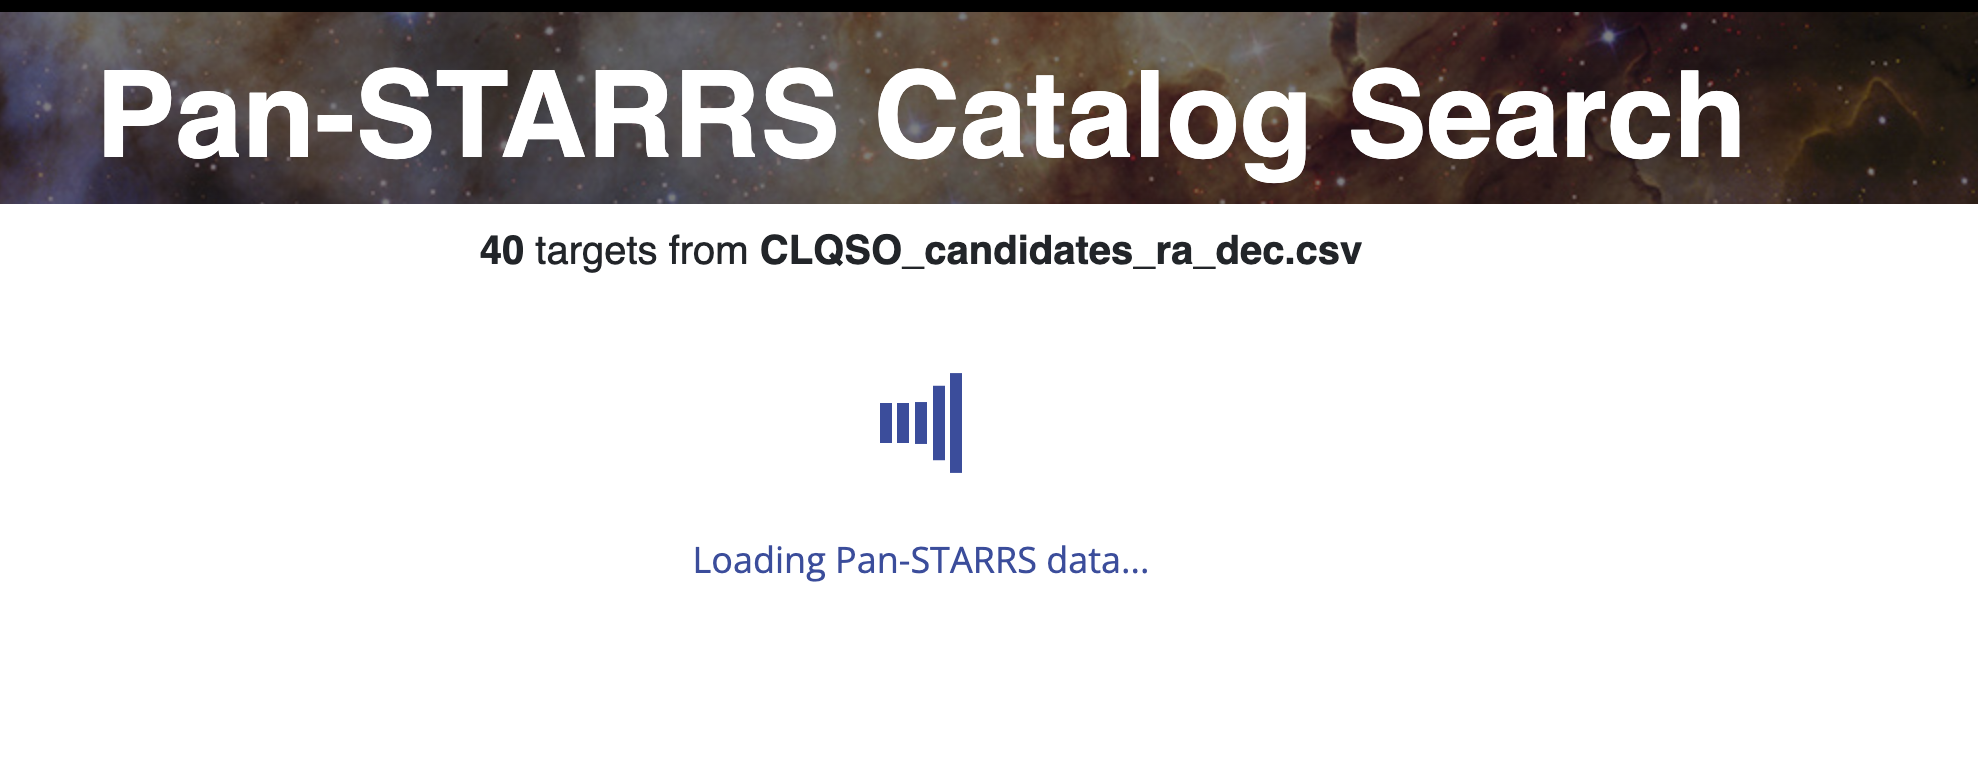

I save the table as CSV file `CLQSO_candidates_PS1_DR2.csv`:

In [23]:
ps1 = Table.read('CLQSO_candidates_PS1_DR2.csv', format='csv')

In [62]:
ps1[:3]

_ra_,_dec_,_searchID_,MatchID,MatchRA,MatchDEC,dstArcSec,objName,objAltName1,objAltName2,objAltName3,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,tessID,projectionID,skyCellID,randomID,batchID,dvoRegionID,processingVersion,objInfoFlag,qualityFlag,raStack,decStack,raStackErr,decStackErr,raMeanErr,decMeanErr,epochMean,posMeanChisq,cx,cy,cz,lambda,beta,l,b,nStackObjectRows,nStackDetections,nDetections,ng,nr,ni,nz,ny,gQfPerfect,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagStd,gMeanPSFMagNpt,gMeanPSFMagMin,gMeanPSFMagMax,gMeanKronMag,gMeanKronMagErr,gMeanKronMagStd,gMeanKronMagNpt,gMeanApMag,gMeanApMagErr,gMeanApMagStd,gMeanApMagNpt,gFlags,rQfPerfect,rMeanPSFMag,rMeanPSFMagErr,rMeanPSFMagStd,rMeanPSFMagNpt,rMeanPSFMagMin,rMeanPSFMagMax,rMeanKronMag,rMeanKronMagErr,rMeanKronMagStd,rMeanKronMagNpt,rMeanApMag,rMeanApMagErr,rMeanApMagStd,rMeanApMagNpt,rFlags,iQfPerfect,iMeanPSFMag,iMeanPSFMagErr,iMeanPSFMagStd,iMeanPSFMagNpt,iMeanPSFMagMin,iMeanPSFMagMax,iMeanKronMag,iMeanKronMagErr,iMeanKronMagStd,iMeanKronMagNpt,iMeanApMag,iMeanApMagErr,iMeanApMagStd,iMeanApMagNpt,iFlags,zQfPerfect,zMeanPSFMag,zMeanPSFMagErr,zMeanPSFMagStd,zMeanPSFMagNpt,zMeanPSFMagMin,zMeanPSFMagMax,zMeanKronMag,zMeanKronMagErr,zMeanKronMagStd,zMeanKronMagNpt,zMeanApMag,zMeanApMagErr,zMeanApMagStd,zMeanApMagNpt,zFlags,yQfPerfect,yMeanPSFMag,yMeanPSFMagErr,yMeanPSFMagStd,yMeanPSFMagNpt,yMeanPSFMagMin,yMeanPSFMagMax,yMeanKronMag,yMeanKronMagErr,yMeanKronMagStd,yMeanKronMagNpt,yMeanApMag,yMeanApMagErr,yMeanApMagStd,yMeanApMagNpt,yFlags,uniquePspsP2id,detectID,filterID,imageID,randomDetID,obsTime,xPos,yPos,xPosErr,yPosErr,pltScale,posAngle,ra,dec,raErr,decErr,extNSigma,zp,telluricExt,expTime,airMass,psfFlux,psfFluxErr,psfMajorFWHM,psfMinorFWHM,psfTheta,psfCore,psfQf,psfQfPerfect,psfChiSq,psfLikelihood,momentXX,momentXY,momentYY,momentR1,momentRH,momentM3C,momentM3S,momentM4C,momentM4S,apFlux,apFluxErr,apFillF,apRadius,kronFlux,kronFluxErr,kronRad,sky,skyErr,infoFlag,infoFlag2,infoFlag3,mag,magerr
float64,float64,int64,int64,float64,float64,float64,str21,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64
17.05,-0.088,5,107890170499734957,17.05000551,-0.0879278,0.25856791058118606,PSO J017.0500-00.0879,-999,-999,-999,3492271000046739,362971981198995,0,8831540672094,10789,1,1236,92,0.860817087684588,3492271,84511,3,436527256,52,17.0499639,-0.087881,0.0010000000474974513,0.0010000000474974513,0.009990000165998936,0.010300000198185444,56098.67769676,0.8784999847412109,0.9560480954304549,0.2932058732999675,-0.0015346290116704962,15.681541285922487,-6.778917690952037,132.0874168627157,-62.661330414097314,-999,5,69,14,13,20,13,9,0.9993240237236023,20.83329963684082,0.049421001225709915,0.25181299448013306,11,20.702899932861328,21.382999420166016,20.941699981689453,0.06

Show which filters are available:

In [26]:
import numpy as np
np.unique(ps1['filterID'])

1
2
3
4
5


Here '12345' stands for `grizy` for PS1.  So to see only `r`-band data we select `filterId`=`2`:

In [39]:
idCols = [name  for name in ps1.colnames  if 'ID' in name]

Unfortunately the `searchString` somehow didn't get saved in the downloaded CSV table. Thus we need to find out which object this corresponds to by _ra, _dec.  If they're unique, we'll just use "_ra"  as object identifier

In [46]:
len(np.unique(clqso['ra']))

40

Ok, so since all 'ra' are unique, we can use them instead of 'dbId' for object identifier. Make sure same 'ra' are in the PS1 catalog:

In [50]:
len(np.unique(ps1['_ra_']))

40

In [51]:
np.sum(np.in1d(np.unique(ps1['_ra_']), np.unique(clqso['ra'])))

40

Ok, so all `_ra_` values in PS1 table are same as `ra` in clqso table. 

Convert `psfFlux` to magnitudes:

In [53]:
def flux2absigma(flux, fluxsigma):
    """Compute AB mag sigma given flux and flux sigma

    Here units of flux,  fluxsigma  don't matter 
    as long as they are consistent, since we are dividing 
    one by the other, so all the units cancel out.
    """
    FIVE_OVER_2LOG10 = 1.085736204758129569
    return FIVE_OVER_2LOG10 * fluxsigma / flux;


def flux2ab(flux, unit = 'Jy'):
    """Compute AB mag given flux. 

    Accept two unit types :  
    *  'cgs', meaning flux is in  ergs / s / Hz / cm2
    *  'Jy', meaning flux is in Jy.  1 Jy = 1E-23 * ergs/s/Hz/cm2
    """
    if unit == 'Jy':
        return -2.5 * np.log10(flux) + 8.90
    elif unit == 'cgs':
        return -2.5 * np.log10(flux) - 48.6

From https://outerspace.stsci.edu/display/PANSTARRS/PS1+Detection+table+fields I find that units of `psfFLux` are Janskys.

In [54]:
ps1['mag'] = flux2ab(ps1['psfFlux'])

/var/folders/y_/cnss5hqs3nz9dv_dd28yzt040000gq/T/ipykernel_43852/2050886779.py:20: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(flux) + 8.90
/var/folders/y_/cnss5hqs3nz9dv_dd28yzt040000gq/T/ipykernel_43852/2050886779.py:20: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + 8.90


In [55]:
ps1['magerr'] = flux2absigma(ps1['psfFlux'], ps1['psfFluxErr'])

/var/folders/y_/cnss5hqs3nz9dv_dd28yzt040000gq/T/ipykernel_43852/2050886779.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return FIVE_OVER_2LOG10 * fluxsigma / flux;


Show light curve for a particular object in a clqso table:

In [58]:
clqso[0]['ra']

4.111

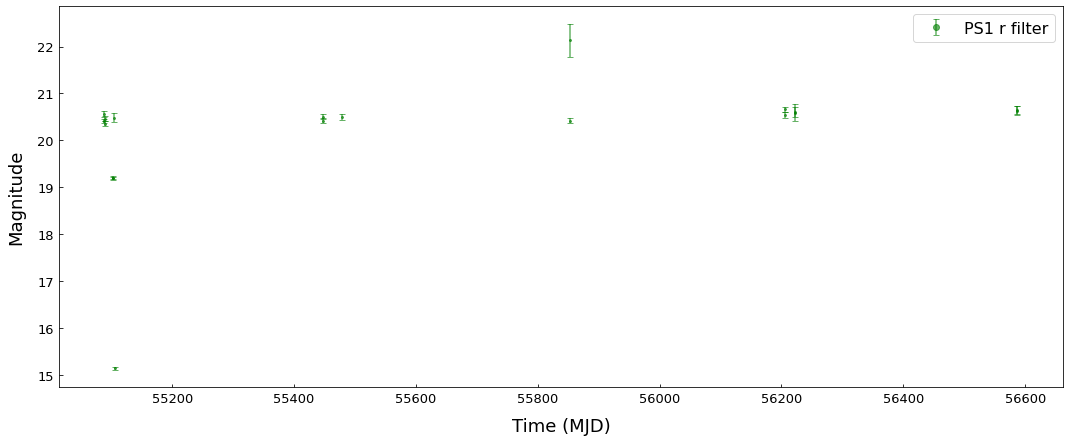

In [64]:
# select only  rows for that object
mask_object = ps1['_ra_'] == clqso[0]['ra']

# plot the light curve in r-band 
mask_filter = ps1['filterID'] == 2 

# combine the masks
mask = mask_object * mask_filter

# plot the figure
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot()

lc = ps1[mask]
ax.errorbar(lc['obsTime'], lc['mag'], yerr= lc['magerr'], 
            fmt='go', markersize=2,alpha=0.6,capsize=3, label='PS1 r filter')
ax.set_xlabel('Time (MJD)',fontsize = 18, labelpad=12)
ax.set_ylabel('Magnitude',fontsize = 18,labelpad=12)
ax.tick_params(direction='in', pad = 5, labelsize=13)
ax.legend(fontsize=16, markerscale=3)

In [ ]:
ps1[mask]


## Get the ZTF data 

The ZTF DR7 data https://www.ztf.caltech.edu/ztf-public-releases.html  can be downloaded using the `wget`-based function written by Paula Sanchez-Saez here https://github.com/LSST-sersag/dle/blob/main/activities/workshop/T2_Photometric_Reverberation_Mapping/Tutorial%202_PhotoRM_IJ.ipynb . I modify it to do just the downloading, because I prefer to read the files with astropy:

In [71]:
import pandas as pd
def get_ZTF_DR_lc(name, ra, dec, band, dr_path, keep_all_columns = False):
    
    """
    Author: Paula Sánchez Sáez, PhD
    
    Function to dowload an individual ZTF light curve using the ZTF API. 
    For more details about ZTF service, go to their documentation:
    https://irsa.ipac.caltech.edu/data/ZTF/docs/releases/dr08/ztf_release_notes_dr08.pdf 
    See section "iii. Querying Lightcurves using the API."
    
    Parameters:
    -----------
    name: str
        Object name (e.g. the object "SDSS J005132.94+180120.5" should be 
        refered here only by "J005132.94+180120.5")
    ra: float
        Right ascension of the object (in degrees).
    dec: float
        Declination of the object (in degrees).
    band: {'g', 'r', 'i'}
        ZTF photometric band.
    dr_path: str
        Path to the download directory.
    keep_all_columns: bool, default=False
        If False, only the most important light curve parameters will be retrieved. 
        Otherwise, keep all the columns.
        
    Returns:
    --------
    df: pd.DataFrame
        DataFrame containing the measurments of the retrieved light curve.
    """
    
    # make up a convenient filename
    fname = f'{name}_ZTF_{band}.csv'
    
    # don't download if the file already exists
    if os.path.exists(fname): 
        print(f'File {fname} already exists')
        
    else:
        file_path = os.path.join(dr_path, fname)
        irsa_path = "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves"
        url = f"{irsa_path}?POS=CIRCLE {ra} {dec} 0.000277778&BANDNAME={band}&FORMAT=csv"
        cmd = f'wget -O {file_path} '+ f'"{url}"' 
        print(cmd)
        os.system(cmd) 
   

In [11]:
3600*0.000277778

1.0000008

To make it work notice that  ZTF expects object name to have "J0016...", so we add that:

In [55]:
clqso["SDSSJID2"] = ["J"+name for name in clqso["SDSSJID"]]

Download all available ZTF data for CLQSO candidates:

In [62]:
name = row['SDSSJID2']
band='r'
ra = row["ra"]
dec = row["dec"]
cmd ='wget -O '+dr_path+name+'_DR_'+band+'band.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE '+str(ra)+' '+str(dec)+' 0.000277778&BANDNAME='+band+'&FORMAT=csv"'
print(cmd)

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFJ235248.71-001518.4_DR_rband.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 358.203 -0.255 0.000277778&BANDNAME=r&FORMAT=csv"


In [ ]:
# make a directory if it doesn't exist yet
dr_path = os.path.join(os.getcwd(), 'ZTF')
if not os.path.exists(dr_path):
    os.mkdir(dr_path)

# download the ZTF data 
for row in clqso:
    for f in 'gri':
        get_ZTF_DR_lc(name=row['SDSSJID2'], 
                      ra=row["ra"], 
                      dec=row["dec"], 
                      band=f, 
                      dr_path=dr_path)
    


Not all of these objects have ZTF data... This can be checked with `wc -l *` :

In [12]:
! wc -l ZTF/*

       1 ZTF/J001626.54+003632.4_ZTF_g.csv
       1 ZTF/J001626.54+003632.4_ZTF_i.csv
       1 ZTF/J001626.54+003632.4_ZTF_r.csv
       1 ZTF/J001731.70+004910.1_ZTF_g.csv
       1 ZTF/J001731.70+004910.1_ZTF_i.csv
       1 ZTF/J001731.70+004910.1_ZTF_r.csv
       1 ZTF/J003359.39+000230.0_ZTF_g.csv
       1 ZTF/J003359.39+000230.0_ZTF_i.csv
       1 ZTF/J003359.39+000230.0_ZTF_r.csv
     175 ZTF/J005142.20+002129.0_ZTF_g.csv
      13 ZTF/J005142.20+002129.0_ZTF_i.csv
     238 ZTF/J005142.20+002129.0_ZTF_r.csv
       1 ZTF/J005513.15-005621.2_ZTF_g.csv
       1 ZTF/J005513.15-005621.2_ZTF_i.csv
     248 ZTF/J005513.15-005621.2_ZTF_r.csv
     105 ZTF/J010812.00-000516.5_ZTF_g.csv
       7 ZTF/J010812.00-000516.5_ZTF_i.csv
     183 ZTF/J010812.00-000516.5_ZTF_r.csv
     224 ZTF/J012114.19-010310.8_ZTF_g.csv
      35 ZTF/J012114.19-010310.8_ZTF_i.csv
     242 ZTF/J012114.19-010310.8_ZTF_r.csv
       1 ZTF/J014303.23-004354.0_ZTF_g.csv
       1 ZTF/J014303.23-004354.0_ZTF_i.csv
       1 ZT

**Next:**

   * plot SDSS-r, PS1-r, ZTF-r without photometric offsets
   * apply offsets to ZTF data (PS1 not needed)
    

In [66]:
lc = Table.read(os.path.join("ZTF/J005142.20+002129.0_ZTF_g.csv"), format='csv')

In [67]:
lc

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
int64,int64,float64,float64,float64,float64,int64,str2,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64
398116200003850,56444214,2458318.9437737395,58318.4421412,20.188715,0.148561925,0,zg,12.9258352,0.3581377,0.503000021,0.0219999999,20180719442130,398,16.0,2.0,21.5100002,26.022934,0.0291860513,-0.0364010073,2.3867753e-05,30,1.56099999,1
398116200003850,56744182,2458321.943741912,58321.4418287,20.220993,0.15103519,0,zg,12.9258323,0.3580945,1.29999995,-0.273999989,20180722441817,398,16.0,2.0,21.6200008,26.0712204,0.0300714709,-0.0705891103,2.49805871e-05,30,1.505,1
398116200003850,58046409,2458334.967168585,58334.4640972,20.138958,0.144691929,0,zg,12.9259626,0.358081,0.65200001,-0.104999997,20180804464086,398,16.0,2.0,20.8899994,26.0762634,0.0307674464,-0.0634471253,3.10505347e-05,30,1.27999997,1
398116200003850,58341781,2458337.9211293305,58337.4178125,20.2997589,0.156894803,0,zg,12.9258351,0.3580738,1.41499996,0.112000003,20180807417801,398,16.0,2.0,21.5200005,26.0372963,0.0276717711,-0.0537689365,2.14585853e-05,30,1.39999998,1
398116200003850,58646081,2458340.964371791,58340.4608102,20.3387699,0.159674987,0,zg,12.9260444,0.3581251,1.14499998,0.206,20180810460799,398,16.0,2.0,21.1100006,25.7641506,0.0319564417,-0.0764217749,3.21859916e-05,30,1.26199996,1
398116200003850,58943862,2458343.9424151652,58343.4386227,20.249958,0.153222591,0,zg,12.9258816,0.3581248,1.10599995,0.131999999,20180813438553,398,16.0,2.0,21.7700005,26.0056839,0.0248786286,-0.0458719023,1.79495601e-05,30,1.28499997,1
398116200003850,59141212,2458345.9160700194,58345.4121296,20.3603477,0.161169261,0,zg,12.9259317,0.3581282,0.595000029,-0.00800000038,20180815412118,398,16.0,2.0,21.6900005,25.9894371,0.0275055058,-0.0714460611,2.12698815e-05,30,1.34099996,3
398116200003850,59247800,2458346.982027913,58346.4780093,20.4925919,0.16943267,0,zg,12.9257305,0.3581748,0.593999982,0.0909999982,20180816477998,398,16.0,2.0,21.3199997,25.9353027,0.0318488479,-0.0325130112,2.98525283e-05,30,1.255,3
398116200003850,59247892,2458346.9829422683,58346.4789236,20.202219,0.149600804,0,zg,12.9258816,0.358169,0.662999988,0.158999994,20180816478912,398,16.0,2.0,21.2700005,25.9479313,0.0341866724,-0.0348078683,3.4614488e-05,30,1.255,1


In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

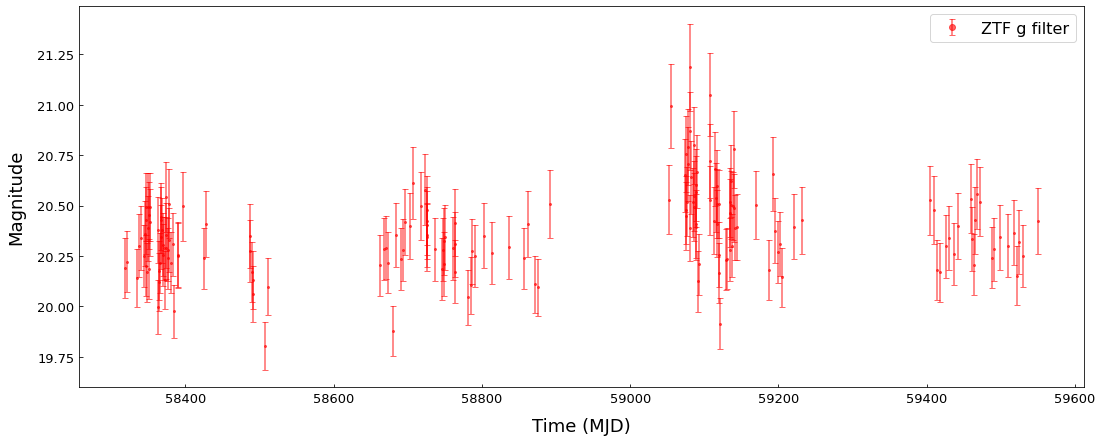

In [68]:
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot()

ax.errorbar(lc['mjd'], lc['mag'], yerr= lc['magerr'], 
            fmt='ro', markersize=2,alpha=0.6,capsize=3, label='ZTF g filter')
ax.set_xlabel('Time (MJD)',fontsize = 18, labelpad=12)
ax.set_ylabel('Magnitude',fontsize = 18,labelpad=12)
ax.tick_params(direction='in', pad = 5, labelsize=13)
ax.legend(fontsize=16, markerscale=3)